[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/6_WebScrapping.ipynb)

# 2.15. Introducción - Web Scrapping

Sabemos que **INTERNET** está compuesta por muchos millones de documentos enlazados entre sí, conocidos también como páginas web. 

El texto fuente de las páginas web está escrito en lenguaje Hypertext Markup Language (HTML). Los códigos fuente en HTML son una mezcla de informaciones legibles para los humanos y códigos legibles para las máquinas, llamados tags o etiquetas. El navegador, como puede ser Chrome, Firefox, Safari o Edge, procesa el texto fuente, interpreta las etiquetas y presenta al usuario la información que contienen.

Para extraer del texto fuente únicamente la información que le interesa al usuario, se utiliza un <font color=red>software especial</font>. Se trata de los programas llamados web scrapers, crawlers, spiders o, simplemente, bots, que examinan el texto fuente de las páginas en busca de patrones concretos y extraen la información que contienen. Los datos conseguidos mediante web scraping posteriormente se resumen, combinan, evalúan o almacenan para ser usados más adelante.

## Web scraping en términos generales

El Web Scraping (raspado web) es la técnica de extraer datos de sitios web de forma automática​. Básicamente, un programa de web scraping simula la navegación de un usuario: realiza peticiones HTTP a páginas web y luego analiza el HTML resultante para obtener información específica (por ejemplo, precios de productos, titulares de noticias, comentarios en redes sociales, etc.).

---
<img src="../imgs/Web_scrapping.png" alt="Web_scrapping" width="800">

---

En primer lugar, el desarrollador del scraper analiza el texto fuente en HTML de la página web en cuestión. Por lo general, encontrará patrones claros que permitirán extraer la información deseada. El scraper será entonces programado para identificar dichos patrones y realizará el resto del trabajo automáticamente:

   * Abrir la página web a través del URL
   * Extraer automáticamente los datos estructurados a partir de los patrones
   * Resumir, almacenar, evaluar o combinar los datos extraídos, entre otras acciones

### Casos de aplicación del web scraping

El web scraping puede tener aplicaciones muy diversas. Además de la indexación de buscadores, el web scraping también puede usarse con los siguientes fines, entre muchos otros:

  * <font color="blue">Crear bases de datos de contactos</font>
  * <font color="blue">Controlar y comparar ofertas online</font>
  * <font color="blue">Reunir datos de diversas fuentes online</font>
  * <font color="blue">Observar la evolución de la presencia y la reputación online</font>
  * <font color="blue">Reunir datos financieros, meteorológicos o de otro tipo</font>
  * <font color="blue">Observar cambios en el contenido de páginas web</font>
  * <font color="blue">Reunir datos con fines de investigación</font>
  * <font color="blue">Realizar exploraciones de datos o data mining</font>

### Herramientas de scraping para Python

<img src="../imgs/Elementos_Web_scrap.png" alt="Elementos_Web_scrap" width="900">

Se suele usar en conjunto con librerías como **[BeautifulSoup](https://pypi.org/project/beautifulsoup4/)** o **[Scrapy](https://scrapy.org/)**, que facilitan navegar por la estructura del HTML y localizar elementos (por etiquetas, clases CSS, etc.).

<font color="red">Hay que respetar los términos de servicio de los sitios web y consideraciones legales. Muchas páginas permiten el scraping para uso personal pero prohíben la recolección masiva para uso comercial sin permiso.</font>

Las técnicas van desde hacer simples peticiones HTTP y parsear HTML, hasta usar APIs (cuando el sitio las ofrece) o incluso automatizar un navegador con herramientas como **[Selenium](https://selenium-python.readthedocs.io/)** cuando el contenido es dinámico (generado por JavaScript en el cliente).

<font color="brown">Web scraping está relacionado con la indexación web (lo que hacen los motores de búsqueda), pero mientras la indexación busca catalogar información de forma general, el scraping suele tener un fin más específico (extraer datos concretos para un análisis particular).</font>

**A continuación, nos enfocaremos solamente BeautifulSoup.**

### Estructura de la página HTML

El lenguaje de marcado de hipertexto (HTML) es el lenguaje de marcado estándar para documentos diseñados para mostrarse en un navegador web. HTML describe la estructura de una página web y se puede utilizar con hojas de estilo en cascada (CSS) y un lenguaje de secuencias de comandos como JavaScript para crear sitios web interactivos. HTML consta de una serie de elementos que "le dicen" al navegador cómo mostrar el contenido. Por último, los elementos se representan mediante etiquetas.

Aquí hay algunas etiquetas:

    La declaración <!DOCTYPE html> define este documento como HTML5.
    El elemento <html> es el elemento raíz de una página HTML.
    La etiqueta <div> define una división o una sección en un documento HTML. Suele ser un contenedor de otros elementos.
    El elemento <head> contiene metainformación sobre el documento.
    El elemento <title> especifica un título para el documento.
    El elemento <body> contiene el contenido de la página visible.
    El elemento <h1> define un encabezado grande.
    El elemento <p> define un párrafo.
    El elemento <a> define un hipervínculo.

Las etiquetas HTML normalmente vienen en pares como $<p>$ y $</p>$. La primera etiqueta de un par es la etiqueta de apertura, la segunda etiqueta es la etiqueta de cierre. La etiqueta final se escribe como la etiqueta inicial, pero con una barra diagonal insertada antes del nombre de la etiqueta.

### 2.15.1 Breves ejemplos de web scraping

---

### Ejemplo 1 : Extraer citas y autores

Usaremos `requests` y `BeautifulSoup` para acceder y raspar el contenido de [web Quotes to Scrape](http://quotes.toscrape.com/), que ofrece toda una colección de citas de personajes famosos pensadas especialmente para ser objeto de test de scraping, para que no tengas que preocuparte por incumplir las condiciones de uso.


In [1]:
#install if needed
#pip install requests beautifulsoup4 openpyxl wordcloud

In [2]:
# Importamos las librerías necesarias
import requests  # Para hacer solicitudes HTTP a las páginas web
import pandas as pd  # Para manejar los datos en estructuras de DataFrame
from bs4 import BeautifulSoup  # Para analizar y extraer datos del HTML
from collections import Counter  # Para contar la frecuencia de las etiquetas (tags)

# Definimos la URL base del sitio de citas
BASE_URL = "http://quotes.toscrape.com"

# Variables para almacenar los datos extraídos
quotes_data = []  # Lista donde se guardarán las citas extraídas
tags_counter = Counter()  # Contador para registrar la frecuencia de las etiquetas (tags)


def get_author_details(author_url):
    """
    Extrae información detallada de un autor desde su página.

    Parámetros:
    - author_url (str): URL de la página del autor.

    Retorna:
    - (str) Fecha de nacimiento del autor.
    - (str) Lugar de nacimiento del autor.
    - (str) Descripción del autor.
    """
    try:
        # Realizamos una solicitud HTTP a la URL del autor
        response = requests.get(author_url, timeout=10)
        response.raise_for_status()  # Lanza una excepción si la respuesta tiene errores HTTP
    except requests.RequestException as e:
        print(f"Error al obtener detalles del autor: {e}")
        return "N/A", "N/A", "N/A"  # Si hay un error, devolvemos "N/A"

    # Analizamos el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraemos la información del autor
    try:
        birth_date = soup.find('span', class_='author-born-date').text.strip()
        birth_location = soup.find('span', class_='author-born-location').text.strip()
        description = soup.find('div', class_='author-description').text.strip()
    except AttributeError:
        return "N/A", "N/A", "N/A"  # Si hay un error en la extracción, devolvemos "N/A"

    return birth_date, birth_location, description


def scrape_page(url):
    """
    Extrae citas, autores y etiquetas de una página específica.

    Parámetros:
    - url (str): URL de la página de citas a extraer.

    No retorna valores directamente, pero almacena los datos en la lista `quotes_data`.
    """
    try:
        # Realizamos una solicitud HTTP a la página
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Verificamos si la solicitud fue exitosa
    except requests.RequestException as e:
        print(f"Error al obtener la página: {e}")
        return None  # Si hay un error, detenemos la función

    # Analizamos el HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscamos todas las citas en la página (están dentro de <div class="quote">)
    quotes_html = soup.find_all('div', class_="quote")

    for quote_block in quotes_html:
        # Extraemos el texto de la cita
        quote_text = quote_block.find('span', class_="text").get_text(strip=True)

        # Extraemos el nombre del autor
        author = quote_block.find('small', class_="author").get_text(strip=True)

        # Extraemos las etiquetas asociadas a la cita
        tags = [tag.get_text(strip=True) for tag in quote_block.find_all('a', class_="tag")]

        # Extraemos el enlace de la página del autor
        author_link_tag = quote_block.find('a', href=True)
        author_link = BASE_URL + author_link_tag['href'] if author_link_tag else 'N/A'

        # Si hay un enlace de autor, extraemos su información
        birth_date, birth_location, description = get_author_details(author_link) if author_link != 'N/A' else ("N/A", "N/A", "N/A")

        # Guardamos la cita junto con toda su información en la lista
        quotes_data.append([quote_text, author, ", ".join(tags), author_link, birth_date, birth_location, description])

        # Contamos las etiquetas para obtener estadísticas de popularidad
        tags_counter.update(tags)

    # Comprobamos si hay más páginas de citas y seguimos extrayendo información si es necesario
    next_page = soup.find('li', class_='next')
    if next_page:
        next_url = BASE_URL + next_page.find('a')['href']
        scrape_page(next_url)  # Llamamos recursivamente a la función con la siguiente página


# Iniciamos el proceso de scraping
print("Iniciando el proceso de extracción de datos...")
scrape_page(BASE_URL)
print(f"Extracción completada. Se han extraído {len(quotes_data)} citas.")

# Convertimos los datos a un DataFrame de pandas
df_quotes = pd.DataFrame(quotes_data, columns=["Cita", "Autor", "Etiquetas", "Enlace del Autor", "Fecha de Nacimiento", "Lugar de Nacimiento", "Descripción"])

# Obtenemos las 10 etiquetas más utilizadas
top_tags = tags_counter.most_common(10)
df_top_tags = pd.DataFrame(top_tags, columns=["Etiqueta", "Frecuencia"])

# Guardamos los datos en formato CSV
csv_filename = "quotes_extended.csv"
df_quotes.to_csv(csv_filename, index=False, encoding='utf-8')
df_top_tags.to_csv("top_tags.csv", index=False, encoding='utf-8')

# Guardamos los datos en formato TXT
txt_filename = "quotes_extended.txt"
with open(txt_filename, "w", encoding="utf-8") as txt_file:
    for _, row in df_quotes.iterrows():
        txt_file.write(f"Cita: {row['Cita']}\n")
        txt_file.write(f"Autor: {row['Autor']}\n")
        txt_file.write(f"Etiquetas: {row['Etiquetas']}\n")
        txt_file.write(f"Enlace del Autor: {row['Enlace del Autor']}\n")
        txt_file.write(f"Fecha de Nacimiento: {row['Fecha de Nacimiento']}\n")
        txt_file.write(f"Lugar de Nacimiento: {row['Lugar de Nacimiento']}\n")
        txt_file.write(f"Descripción: {row['Descripción']}\n")
        txt_file.write("="*80 + "\n")

# Guardamos los datos en formato Excel
xlsx_filename = "quotes_extended.xlsx"
df_quotes.to_excel(xlsx_filename, index=False)

# Devolvemos las rutas de los archivos generados
csv_filename, txt_filename, xlsx_filename, df_top_tags


Iniciando el proceso de extracción de datos...
Extracción completada. Se han extraído 100 citas.


('quotes_extended.csv',
 'quotes_extended.txt',
 'quotes_extended.xlsx',
         Etiqueta  Frecuencia
 0           love          14
 1  inspirational          13
 2           life          13
 3          humor          12
 4          books          11
 5        reading           7
 6     friendship           5
 7        friends           4
 8          truth           4
 9         simile           3)

In [3]:
df_quotes.head(5)

,Cita,Autor,Etiquetas,Enlace del Autor,Fecha de Nacimiento,Lugar de Nacimiento,Descripción
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","in Ulm, Germany","In 1879, Albert Einstein was born in Ulm, Germ..."
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","in Yate, South Gloucestershire, England, The U...",See also: Robert GalbraithAlthough she writes ...
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","in Ulm, Germany","In 1879, Albert Einstein was born in Ulm, Germ..."
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","in Steventon Rectory, Hampshire, The United Ki...",Jane Austen was an English novelist whose work...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926",in The United States,Marilyn Monroe (born Norma Jeane Mortenson; Ju...


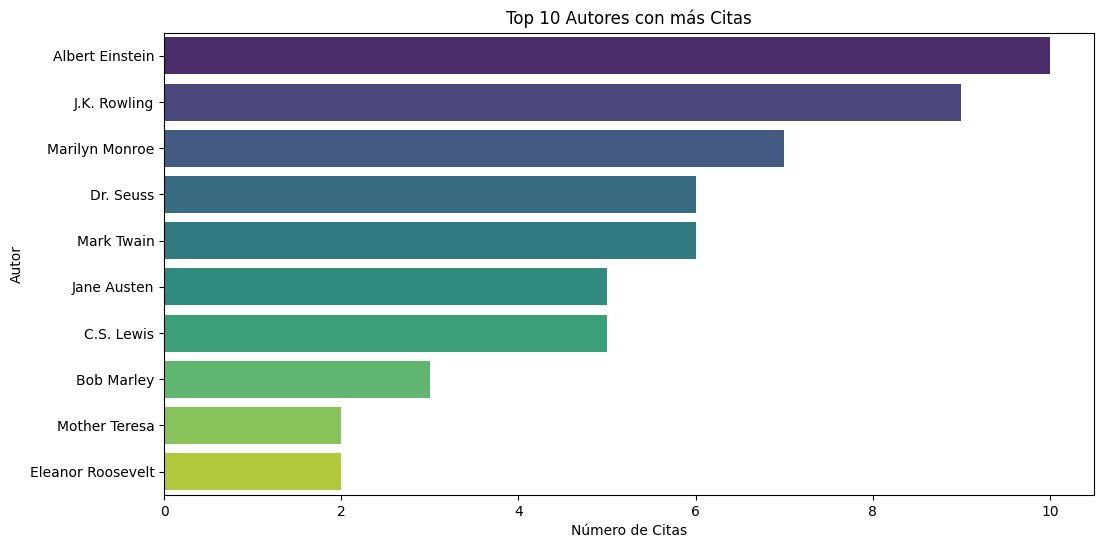

In [4]:
# Importamos las librerías necesarias para visualización de datos
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Librería de visualización avanzada

# Creamos una copia del DataFrame original para trabajar sobre ella
df = df_quotes.copy()

# 1. Distribución de citas por autor
plt.figure(figsize=(12,6))  # Definimos el tamaño del gráfico (12 de ancho, 6 de alto)

# Contamos cuántas citas tiene cada autor y seleccionamos los 10 con más citas
top_authors = df["Autor"].value_counts().head(10)  

# Creamos un gráfico de barras con los autores más citados
sns.barplot(
    x=top_authors.values,   # Número de citas (eje X)
    y=top_authors.index,    # Nombre de los autores (eje Y)
    hue=top_authors.index,  # Se usa `hue` para evitar la advertencia de FutureWarning
    palette="viridis",      # Colores de la paleta 'viridis' para mejor visualización
    legend=False            # Desactivamos la leyenda porque `hue` no la necesita aquí
)

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Número de Citas")  # Etiqueta para el eje X
plt.ylabel("Autor")  # Etiqueta para el eje Y
plt.title("Top 10 Autores con más Citas")  # Título del gráfico

# Mostramos el gráfico en pantalla
plt.show()

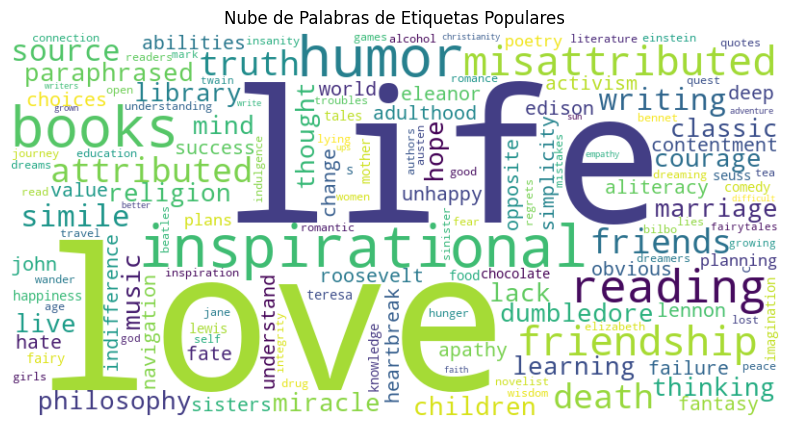

In [5]:
# Importamos la librería necesaria para generar la nube de palabras
from wordcloud import WordCloud  

# 2. Nube de palabras de etiquetas (tags)

# Concatenamos todas las etiquetas en una sola cadena de texto
# 1. `dropna()` -> Elimina valores nulos para evitar errores
# 2. `astype(str)` -> Convierte todas las etiquetas a tipo string (texto)
# 3. `", ".join()` -> Une todas las etiquetas separándolas con una coma y un espacio
all_tags = ", ".join(df["Etiquetas"].dropna().astype(str))

# Generamos la nube de palabras con los siguientes parámetros:
wordcloud = WordCloud(
    width=800,               # Ancho de la imagen en píxeles
    height=400,              # Alto de la imagen en píxeles
    background_color="white" # Color de fondo (blanco para mejor visibilidad)
).generate(all_tags)          # Generamos la nube de palabras a partir de las etiquetas

# Creamos una figura de tamaño adecuado para la visualización
plt.figure(figsize=(10,5))  # Definimos el tamaño de la figura (10 de ancho, 5 de alto)

# Mostramos la nube de palabras generada
plt.imshow(wordcloud, interpolation="bilinear")  # Muestra la imagen interpolada para suavizarla
plt.axis("off")  # Quitamos los ejes para una mejor visualización
plt.title("Nube de Palabras de Etiquetas Populares")  # Añadimos un título a la gráfica

# Mostramos la gráfica
plt.show()

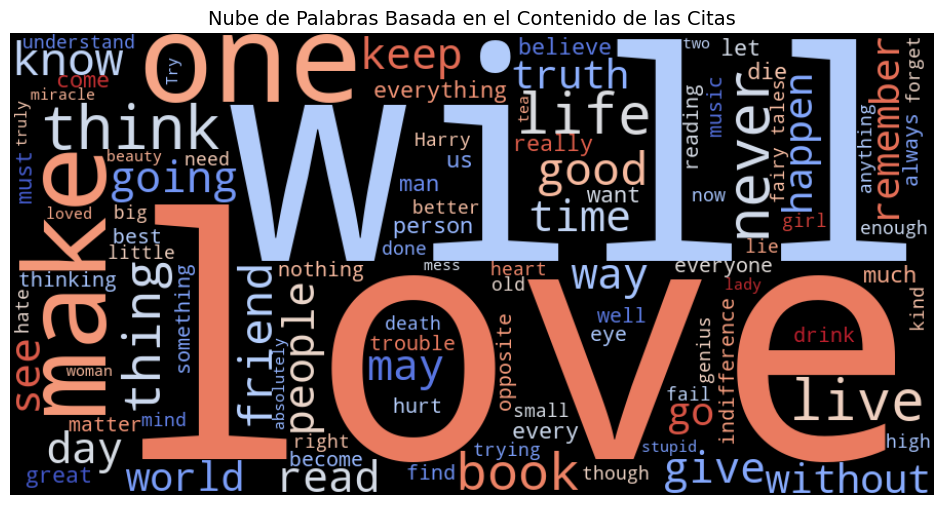

In [6]:
# 3. Nube de palabras basada en el contenido de las citas

# Concatenamos todo el texto de las citas en un solo string
all_quotes_text = " ".join(df["Cita"].dropna().astype(str))  

# Creamos la nube de palabras a partir del texto de las citas
wordcloud_quotes = WordCloud(
    width=900,              # Ancho de la imagen
    height=450,             # Alto de la imagen
    background_color="black",  # Fondo negro para mejor contraste
    colormap="coolwarm",    # Paleta de colores para la nube
    max_words=100,          # Máximo número de palabras a mostrar
).generate(all_quotes_text) # Generar la nube

# Configuración del gráfico
plt.figure(figsize=(12,6))  # Definimos tamaño de la imagen
plt.imshow(wordcloud_quotes, interpolation="bilinear")  # Mostrar imagen interpolada
plt.axis("off")  # Quitamos los ejes
plt.title("Nube de Palabras Basada en el Contenido de las Citas", fontsize=14)  # Título

# Mostrar la nube de palabras
plt.show()

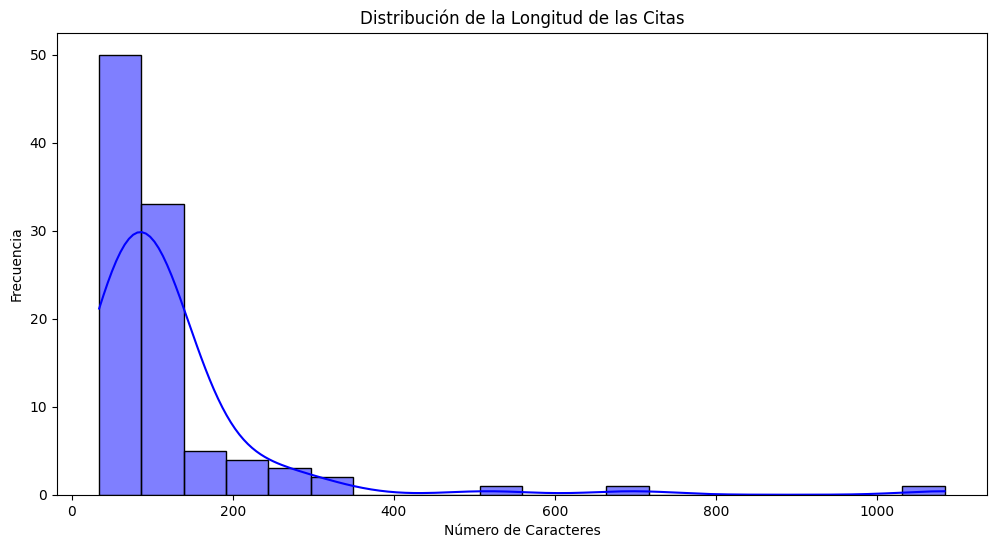

In [7]:
# 4. Distribución de la longitud de las citas

# Calculamos la cantidad de caracteres de cada cita y almacenamos en una nueva columna "Longitud_Cita"
df["Longitud_Cita"] = df["Cita"].apply(lambda x: len(str(x)))  
# La función `len(str(x))` mide la cantidad de caracteres en cada cita.
# Se usa `str(x)` para asegurarnos de que no haya errores con valores nulos.

# Configuración del gráfico
plt.figure(figsize=(12,6))  # Definimos el tamaño de la figura (12 de ancho, 6 de alto)

# Creamos un histograma de la distribución de la longitud de las citas
sns.histplot(
    df["Longitud_Cita"],  # Datos a graficar (longitud de las citas)
    bins=20,              # Número de divisiones en el histograma
    kde=True,             # Activa la línea de densidad (estimación de distribución)
    color="blue"          # Color de las barras
)

# Etiquetas de los ejes y título
plt.xlabel("Número de Caracteres")  # Etiqueta del eje X (longitud de la cita en caracteres)
plt.ylabel("Frecuencia")  # Etiqueta del eje Y (cantidad de citas en cada rango de caracteres)
plt.title("Distribución de la Longitud de las Citas")  # Título del gráfico

# Mostramos el gráfico en pantalla
plt.show()

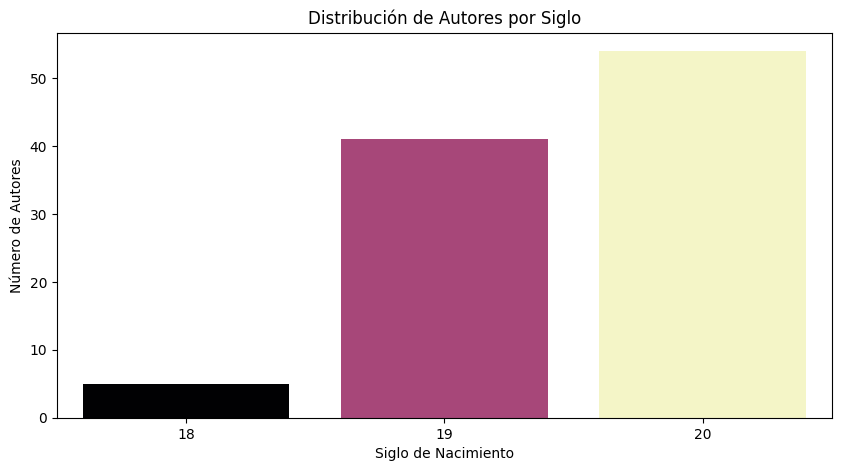

In [8]:
# 5. Autores por siglo (se extrae el siglo de la fecha de nacimiento)

# Extraemos el año de nacimiento de la columna "Fecha de Nacimiento"
# 1. `str.extract(r'(\d{4})')` -> Busca un número de 4 dígitos en la fecha (el año de nacimiento).
# 2. `astype(float)` -> Convierte el año extraído en un número flotante.
df["Año_Nacimiento"] = df["Fecha de Nacimiento"].str.extract(r'(\d{4})').astype(float)

# Calculamos el siglo de cada autor
# 1. `// 100 + 1` -> Convierte el año en siglo (Ej: 1879 -> siglo XIX, 1965 -> siglo XX).
# 2. `astype("Int64")` -> Asegura que los valores sean enteros (evita errores con NaN).
df["Siglo"] = (df["Año_Nacimiento"] // 100 + 1).astype("Int64")

# Configuración del gráfico
plt.figure(figsize=(10,5))  # Definimos el tamaño del gráfico (10 de ancho, 5 de alto)

# Creamos un gráfico de barras con la cantidad de autores por siglo
sns.countplot(
    data=df, 
    x="Siglo",  # Eje X: Siglo de nacimiento de los autores
    hue="Siglo",  # Se asigna `hue=x` para evitar el FutureWarning
    palette="magma",  # Colores para visualizar mejor la distribución
    order=sorted(df["Siglo"].dropna().unique()),  # Ordenamos los siglos de menor a mayor
    legend=False  # Desactivamos la leyenda porque `hue` no la necesita aquí
)

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Siglo de Nacimiento")  # Etiqueta del eje X
plt.ylabel("Número de Autores")  # Etiqueta del eje Y
plt.title("Distribución de Autores por Siglo")  # Título del gráfico

# Mostramos el gráfico en pantalla
plt.show()

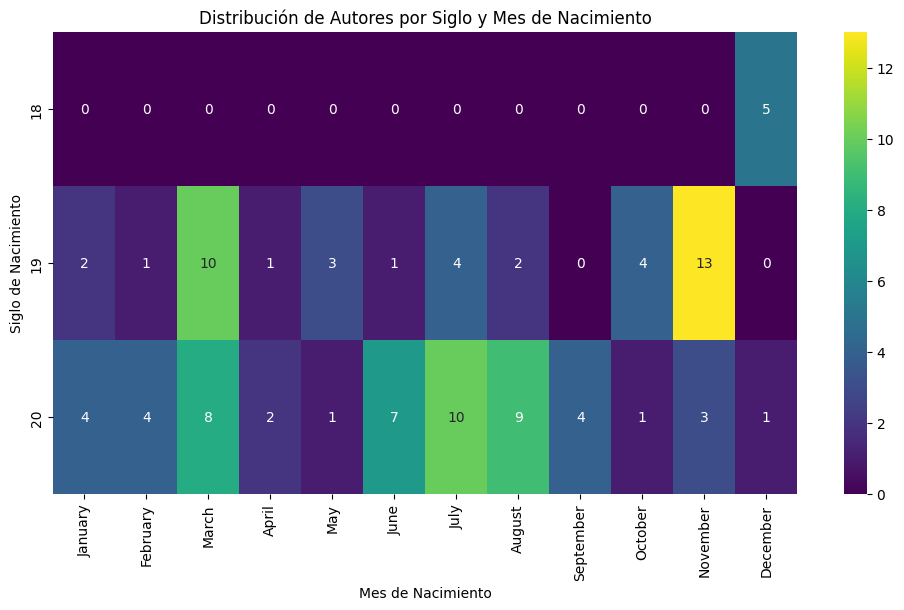

In [9]:
# 6. Autores por mes y siglo

# Extraer el mes de nacimiento desde la columna "Fecha de Nacimiento"
# Explicación:
# - `str.extract(r'([A-Za-z]+)')` usa una expresión regular para buscar y extraer el nombre del mes
# - Se asume que el mes está escrito en inglés (Ejemplo: "March", "July", etc.)
df["Mes_Nacimiento"] = df["Fecha de Nacimiento"].str.extract(r'([A-Za-z]+)')

# Convertimos los meses a un formato ordenado para que seaborn los muestre en el orden correcto
# - `pd.Categorical()` convierte los meses en una variable categórica con un orden específico
# - Se evita que seaborn los ordene alfabéticamente (Ejemplo: "April" antes que "February")
meses_ordenados = ["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"]
df["Mes_Nacimiento"] = pd.Categorical(df["Mes_Nacimiento"], categories=meses_ordenados, ordered=True)

# Contar el número de autores por siglo y mes de nacimiento
# - `groupby(["Siglo", "Mes_Nacimiento"], observed=False).size()` cuenta cuántos autores hay en cada combinación siglo-mes.
# - `unstack()` transforma la tabla en formato de filas (siglos) y columnas (meses).
# - `fillna(0)` llena los valores nulos con 0, evitando errores en la visualización.
df_siglo_mes = df.groupby(["Siglo", "Mes_Nacimiento"], observed=False).size().unstack().fillna(0)

# Configuración del gráfico de calor (heatmap)
plt.figure(figsize=(12,6))  # Define el tamaño del gráfico (12 de ancho, 6 de alto)

# Crear el heatmap con Seaborn
sns.heatmap(
    df_siglo_mes,   # Datos a graficar
    cmap="viridis", # Usamos la paleta de colores 'viridis' para mejor contraste
    annot=True,     # Muestra los valores dentro de cada celda del heatmap
    fmt=".0f"       # Formato de los números (sin decimales)
)

# Etiquetas y título del gráfico
plt.xlabel("Mes de Nacimiento")  # Etiqueta del eje X (meses)
plt.ylabel("Siglo de Nacimiento")  # Etiqueta del eje Y (siglos)
plt.title("Distribución de Autores por Siglo y Mes de Nacimiento")  # Título del gráfico

# Mostrar el gráfico en pantalla
plt.show()

---

### Ejemplo 2 : Extraer peliculas y calificaciones

Usaremos `requests` y `BeautifulSoup` para acceder y raspar el contenido de [la página de inicio de IMDB](https://www.imdb.com).


In [10]:
#  Librerías necesarias para el scraping y análisis de datos
import requests  # Para hacer solicitudes HTTP a IMDb
import pandas as pd  # Para manejar y estructurar los datos en DataFrames
from bs4 import BeautifulSoup  # Para analizar y extraer información del HTML

#  Configuración de los headers para evitar bloqueos en IMDb
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
"""
¿Por qué usamos headers?
- IMDb bloquea algunas solicitudes automatizadas para evitar el scraping masivo.
- El `User-Agent` imita un navegador real, haciendo que la solicitud parezca legítima.
- Si IMDb detecta que las solicitudes provienen de un bot, devuelve errores como 403 (Forbidden).
"""

#  URLs de IMDb para las listas de películas
URL_POPULAR = "https://www.imdb.com/chart/moviemeter/"  # Películas más populares
URL_TOP250 = "https://www.imdb.com/chart/top/"  # Las 250 mejores películas según IMDb

#  Función para extraer datos de IMDb con duración corregida
def scrape_imdb_fixed(url):
    """
    Realiza el scraping de IMDb obteniendo título, año, duración, calificación,
    votos y enlace de cada película en la lista proporcionada.

    Parámetros:
    url (str): Enlace de la página de IMDb a scrapear.

    Retorna:
    list: Lista con la información extraída de cada película.
    """
    
    # Realizamos la solicitud HTTP a IMDb con headers para evitar bloqueos
    response = requests.get(url, headers=HEADERS)
    response.raise_for_status()  # Verifica que la solicitud fue exitosa
    
    # Parseamos el HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    #  Seleccionamos los contenedores de cada película dentro de la página
    movies = soup.select("li.ipc-metadata-list-summary-item")

    #  Lista donde almacenaremos los datos extraídos
    data = []

    #  Recorremos cada película en la lista
    for movie in movies:
        #  Extraer título
        title_tag = movie.select_one("h3.ipc-title__text")  # Elemento <h3> con el título
        title = title_tag.text.strip() if title_tag else "N/A"  # Si no se encuentra, asignamos "N/A"

        #  Extraer metadatos (Año, Duración, Clasificación por edades, etc.)
        metadata_tags = movie.select("div.sc-f30335b4-6 span.sc-f30335b4-7")

        #  Extraer el año de estreno (primera etiqueta en la lista de metadatos)
        year = metadata_tags[0].text.strip() if len(metadata_tags) > 0 else "N/A"

        #  Extraer duración correctamente (siempre contiene "h" o "m")
        duration = " ".join([tag.text.strip() for tag in metadata_tags if "h" in tag.text or "m" in tag.text])
        duration = duration if duration else "N/A"  # Si no hay duración, asignamos "N/A"

        #  Extraer calificación IMDb
        rating_tag = movie.select_one("span.ipc-rating-star--rating")  # Calificación en estrellas
        rating = rating_tag.text.strip() if rating_tag else "N/A"

        #  Extraer número de votos
        votes_tag = movie.select_one("span.ipc-rating-star--voteCount")
        votes = votes_tag.text.strip() if votes_tag else "N/A"

        #  Extraer enlace IMDb
        link_tag = movie.select_one("a.ipc-title-link-wrapper")  # Enlace a la página de la película
        movie_link = "https://www.imdb.com" + link_tag["href"] if link_tag else "N/A"
        
        #  Almacenamos los datos en la lista
        data.append([title, year, duration, rating, votes, movie_link])

    return data  # Retornamos la lista con la información extraída

#  Scraping de IMDb Most Popular Movies con duración corregida
imdb_data_popular = scrape_imdb_fixed(URL_POPULAR)
df_imdb_popular = pd.DataFrame(imdb_data_popular, columns=["Título", "Año", "Duración", "Calificación IMDb", "Votos", "Enlace IMDb"])

#  Scraping de IMDb Top 250 con duración corregida
imdb_data_top250 = scrape_imdb_fixed(URL_TOP250)
df_imdb_top250 = pd.DataFrame(imdb_data_top250, columns=["Título", "Año", "Duración", "Calificación IMDb", "Votos", "Enlace IMDb"])

#  Mostrar los primeros resultados para verificar
print(" Películas Más Populares en IMDb")
print(df_imdb_popular.head(), "\n")

print(" Top 250 Mejores Películas en IMDb")
print(df_imdb_top250.head(), "\n")


 Películas Más Populares en IMDb
          Título   Año Duración Calificación IMDb   Votos  \
0          Anora  2024   2h 19m               7.6  (147K)   
1  El Brutalista  2024   3h 36m               7.5   (67K)   
2      Mickey 17  2025   2h 17m               7.1   (43K)   
3   Emilia Pérez  2024   2h 12m               5.4   (84K)   
4   La sustancia  2024   2h 21m               7.3  (278K)   

                                         Enlace IMDb  
0  https://www.imdb.com/title/tt28607951/?ref_=ch...  
1  https://www.imdb.com/title/tt8999762/?ref_=cht...  
2  https://www.imdb.com/title/tt12299608/?ref_=ch...  
3  https://www.imdb.com/title/tt20221436/?ref_=ch...  
4  https://www.imdb.com/title/tt17526714/?ref_=ch...   

 Top 250 Mejores Películas en IMDb
                                Título   Año Duración Calificación IMDb  \
0                     1. Sueño de fuga  1994   2h 22m               9.3   
1                        2. El padrino  1972   2h 55m               9.2   
2  3. Ba

---

### Ejemplo 3 : Extraer datos dinámicos

Usaremos `requests` y `BeautifulSoup` para acceder y raspar el contenido de [la página de inicio de Cryptocurrency](https://coinmarketcap.com/).


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de CoinMarketCap
url = "https://coinmarketcap.com/"

# User-Agent para evitar bloqueos
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"
}

# Hacer la petición HTTP
response = requests.get(url, headers=headers)

# Verificar si la petición fue exitosa
if response.status_code == 200:
    # Parsear el HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar la tabla de criptomonedas
    table = soup.find("table")

    # Verificar si la tabla fue encontrada
    if table:
        # Extraer todas las filas de la tabla
        rows = table.find_all("tr")

        # Extraer encabezados de la tabla
        headers = [header.text.strip() for header in rows[0].find_all("th")]

        # Extraer datos de cada fila
        data = []
        for row in rows[1:21]:  # Extraer al menos 10 elementos
            columns = row.find_all("td")
            row_data = [col.text.strip() for col in columns]
            if row_data:
                data.append(row_data)

        # Crear un DataFrame con los datos extraídos
        df = pd.DataFrame(data, columns=headers)
        
    else:
        print("No se encontró la tabla en la página de CoinMarketCap.")
else:
    print(f"Error al acceder a la página. Código de respuesta: {response.status_code}")

df.head(20)

,,#,Name,Price,1h %,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Last 7 Days
0,,1,BitcoinBTC,"$83,031.47",0.33%,1.53%,1.01%,"$1.63T$1,629,985,128,552","$20,288,576,386246.92K BTC",19.83M BTC,
1,,2,EthereumETH,"$1,886.38",0.84%,2.27%,8.44%,"$226.58B$226,577,000,432","$9,086,581,1984.83M ETH",120.61M ETH,
2,,3,TetherUSDT,$0.9998,0.01%,0.01%,0.00%,"$143.51B$143,507,641,135","$47,440,566,24047.42B USDT",143.46B USDT,
3,,4,XRPXRP,$2.33,0.63%,2.10%,6.75%,"$133.5B$133,501,765,079","$3,889,599,3441.69B XRP",58.1B XRP,
4,,5,BNBBNB,$628.22,0.73%,3.40%,11.20%,"$85.52B$85,523,654,784","$1,439,589,0862.39M BNB",142.47M BNB,
5,,6,SolanaSOL,$126.06,0.34%,7.07%,0.87%,"$64.28B$64,284,630,666","$2,414,631,89019.15M SOL",509.92M SOL,
6,,7,USDCUSDC,$1.00,0.01%,0.01%,0.02%,"$58.72B$58,718,157,486","$5,299,256,4045.29B USDC",58.71B USDC,
7,,8,DogecoinDOGE,$0.1680,0.35%,4.86%,0.30%,"$24.94B$24,942,909,058","$920,518,5155.47B DOGE",148.45B DOGE,
8,,9,CardanoADA,$0.7159,0.36%,2.93%,3.23%,"$24.74B$24,736,386,895","$796,903,3971.13B ADA",35.23B ADA,
9,,10,TRONTRX,$0.2123,0.25%,4.28%,9.12%,"$20.18B$20,179,014,765","$582,415,6082.74B TRX",95.02B TRX,


## 📌 ¿Por qué es difícil extraer datos dinámicos con esta metodología y qué alternativas existen?

El web scraping con **BeautifulSoup y requests** es una de las formas más populares y accesibles para extraer información de páginas web estáticas. Sin embargo, cuando nos enfrentamos a sitios web que generan contenido dinámico, como **CoinMarketCap**, este método puede ser problemático y poco confiable.  

###  1. Problemas con el scraping de datos dinámicos  
Las dificultades al extraer datos de páginas dinámicas surgen por varias razones:

- **Uso de JavaScript para cargar datos**: Muchas páginas no cargan toda la información en el HTML inicial. En su lugar, ejecutan scripts en **JavaScript** que generan dinámicamente el contenido cuando el usuario interactúa con la página.
- **Estructuras HTML que cambian constantemente**: Sitios web como CoinMarketCap pueden cambiar su estructura HTML con frecuencia, lo que rompe los selectores de BeautifulSoup.
- **Protecciones contra scraping**: Algunas páginas implementan medidas anti-bots, como restricciones de IP, **CAPTCHAs** o bloqueos de ciertos user-agents.
- **Carga diferida (Lazy Loading)**: Algunas secciones de la página no se cargan hasta que el usuario las visualiza o realiza una acción, como desplazarse hacia abajo.

### 2. ¿Podemos mejorar esto con Scrapy o Selenium?  
Sí, pero cada herramienta tiene su propio enfoque y casos de uso:

### **Scrapy** (para scraping estructurado y a gran escala)  
✅ Es un framework de web scraping más robusto que **requests + BeautifulSoup**.  
✅ Permite manejar múltiples solicitudes simultáneamente, lo que lo hace más eficiente.  
✅ Puede trabajar con **APIs** cuando están disponibles en lugar de extraer HTML directamente.  
❌ **Limitación**: No ejecuta JavaScript de forma nativa, por lo que sigue teniendo problemas con páginas dinámicas.

### **Selenium** (para scraping de páginas con JavaScript)  
✅ Permite **automatizar navegadores** como Chrome o Firefox, interactuando con la página como lo haría un usuario real.  
✅ Puede hacer clic en botones, desplazarse, llenar formularios y esperar a que el contenido se cargue.  
✅ **Ideal para sitios web dinámicos**, pero es **más lento y pesado** que Scrapy y BeautifulSoup.  
❌ **Desventaja**: Puede ser bloqueado con más facilidad por las medidas anti-bots de algunos sitios.

### 3. ¿Cuál es la mejor opción para CoinMarketCap?  
Si bien **requests + BeautifulSoup** funciona para extraer datos básicos, **CoinMarketCap es altamente dinámico** y en algunos casos usa JavaScript para cargar información, lo que puede hacer que este método falle.  

Las **alternativas más viables** serían:
- **Consultar la API de CoinMarketCap** (si está disponible) en lugar de hacer scraping.
- **Usar Selenium** si realmente es necesario interactuar con la página para obtener los datos.
- **Probar Scrapy** si se necesita scraping estructurado, pero asegurando que la información requerida esté en el HTML cargado.

### **Conclusión**  
Para datos **estáticos**, **BeautifulSoup** es eficiente.  
Para datos **dinámicos**, **Scrapy** puede ser útil, pero **Selenium** es la mejor opción cuando la información solo aparece después de que la página ejecuta JavaScript. 🚀


----
----
----

# **Cierre del Módulo 2: Análisis Estadístico de Datos**

## 🔍 **De la Estadística a la Inteligencia Artificial**  

A lo largo de este módulo hemos explorado herramientas estadísticas fundamentales que nos permiten entender y analizar datos. Pero aquí no termina la historia. En realidad, **la estadística es el puente que conecta el análisis de datos con el Machine Learning (ML) y el Deep Learning (DL)**.  

Antes de que las máquinas puedan aprender, necesitamos asegurarnos de que los datos sean **relevantes, limpios y representativos**. La estadística nos ayuda a responder preguntas como:  

✔️ **¿Cómo se distribuyen los datos?**  
✔️ **¿Existen valores atípicos que puedan sesgar nuestro modelo?**  
✔️ **¿Cuáles son los patrones subyacentes en la información?**  

Con este conocimiento, podemos construir modelos más robustos y hacer predicciones más confiables.  

---

## 🌐 **Web Scraping: Extrayendo Datos para Ciencia de Datos**  

No siempre contamos con datasets listos para analizar. Muchas veces, la información que necesitamos está distribuida en páginas web, pero en un formato **no estructurado**. Aquí es donde entra en juego el **Web Scraping**.  


<img src="../imgs/Transformando_datos.png" alt="Transformando_datos" width="800">

El Web Scraping es una técnica que nos permite **extraer datos automáticamente de sitios web**. Por ejemplo, si queremos analizar la evolución de los precios de criptomonedas, podríamos hacer scraping de CoinMarketCap para obtener los datos en tiempo real.  

🔹 **Herramientas comunes**:  
- 📌 `BeautifulSoup` y `requests` para extraer información de HTML.  
- 🕷️ `Scrapy` para scraping avanzado y estructurado.  
- 🌍 `Selenium` para interactuar con sitios web dinámicos.  

💡 **Pero cuidado**: el scraping debe hacerse con ética y respetando los términos de uso de los sitios web.  

---

## 📊 **Estadística en Machine Learning y Deep Learning**  

En los siguientes módulos, veremos cómo la estadística se convierte en una herramienta clave para el **aprendizaje automático**.  

<img src="../imgs/Evaluacion_rendimiento.png" alt="Evaluacion_rendimiento" width="800">

### 📌 **En Machine Learning (ML):**
- 🏆 **Evaluación de modelos:** Métricas como precisión, recall y F1-score.  
- 🔀 **Validación cruzada:** Cómo estimar el rendimiento real de un modelo.  
- 🎯 **Optimización de hiperparámetros:** Uso de técnicas estadísticas para encontrar el mejor modelo.  

<img src="../imgs/Proceso_Evaluacion.png" alt="Proceso_Evaluacion" width="800">

### 📌 **En Deep Learning (DL):**
- 📈 **Optimización con descenso de gradiente:** Basado en derivadas y probabilidades.  
- 🔢 **Regularización de modelos:** Métodos estadísticos para evitar el sobreajuste.  
- 🔍 **Interpretación de modelos neuronales:** Uso de métricas para evaluar su desempeño.  

<img src="../imgs/Optimizacion_modelos.png" alt="Optimizacion_modelos" width="800">

---

## 🚀 **Lo Que Viene: ¡A Construir Modelos!**  

Con esta base estadística, estamos listos para dar el siguiente paso: **enseñar a las máquinas a aprender**. En el siguiente módulo, exploraremos **Machine Learning**, donde construiremos modelos que analicen datos, hagan predicciones y optimicen decisiones.  

📢 **¿Estás listo para la acción?** Nos vemos en el próximo módulo, donde convertiremos números y ecuaciones en **modelos inteligentes**.  

🔹 **Gracias por tu esfuerzo y entusiasmo. ¡A seguir aprendiendo!**  


---
---
---
<h1><center>Referencias y links de interés</center></h1>

---

* [Rvest para R](https://www.r-bloggers.com/2019/07/beautifulsoup-vs-rvest/)
* [Scrapy](https://scrapy.org/)
* [Selenium](https://selenium-python.readthedocs.io/)
* [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)

-------

* [Tutorial Scrapy](https://docs.scrapy.org/en/latest/intro/tutorial.html)
* [Ejemplos de Scrapy](https://www.analyticsvidhya.com/blog/2017/07/web-scraping-in-python-using-scrapy/)

-------
* [Tutorial Selenium](https://selenium-python.readthedocs.io/getting-started.html)
* [Ejemplos de Selenium](https://www.guru99.com/selenium-python.html)

-------

* [Tutorial de BeautifulSoap](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Ejemplos de BeautifulSoap](https://realpython.com/beautiful-soup-web-scraper-python/)